<a href="https://colab.research.google.com/github/seyoung911/ClearWater/blob/master/Assignment07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import matplotlib.pyplot as plt

path = "/content/drive/My Drive/Colab Notebooks/data-nonlinear.txt"

data    = np.genfromtxt(path, delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]



In [0]:
import random
import math
import numpy

numOfData = 118
z = 0
costsum = 0
commonsum = 0
defender = 0.000001
alpha = 0.06 #learning rate

lambda1 = 0.00001
lambda2 = 0.01
lambda3 = 0.1

theta1_array = [] 
theta2_array = []
theta3_array = []

theta1_array.clear()
theta2_array.clear()
theta3_array.clear()

cost1_array = []
cost2_array = []
cost3_array = []

training_accuracy_1 = []
training_accuracy_2 = []
training_accuracy_3 = []


# (1) theta1_array
# 세타 00 - 세타 99까지 세타값 100개 넣을 거임
# theta1_array = [[0] * 10 for i in range(10)] # 10*10 으로 생성해도 됨

for i in range(10):
    line = []                                    # 내부 리스트로 사용할 empty list 생성
    for j in range(10):
        line.append(random.uniform( 1, 1.5 ))    # 내부 리스트에 0 - 0.1사이의 값으로 초기값 설정
    theta1_array.append(line)                    # 외부 리스트에 내부 리스트를 추가/ theta 1,2,3 전부 생성
    theta2_array.append(line)
    theta3_array.append(line)


# (2) z = g( xi, yi, theta) 생성해주는 함수 

def z_func( xi, yi, theta_array ) :
  zsum = 0
  for m in range(10) :
    for n in range(10) :
      zsum = zsum + theta_array[m][n] * xi**m * yi**n
  return zsum # zsum = 세타00 + 세타01*x**0*y**1 +.........

# (3) sigmoid 함수 정의

def sigmoid ( input ) :  # input 은 float type
  return 1 / (1 + math.exp(-input))

# (4) cost function (objective fuction) 디자인

for j in range( numOfData ) :
  
  # 매 이터레이션마다 변수 초기화
  thetasum = 0
  costsum = 0
  commonsum = 0
  BJ1 = 0

  for m in range (10) :
    for n in range(10) :
      thetasum = thetasum + theta1_array[m][n]**2
  
  for i in range( numOfData ) : # i : 0 ~ 117
  
    z = z_func( pointX[i], pointY[i], theta1_array )

    costsum = costsum + label[i] * math.log( sigmoid(z) + defender ) + ( 1 - label[i] ) * math.log( 1 - sigmoid(z) + defender )
    #commonsum 정의
    commonsum = commonsum + sigmoid(z) - label[i]
    
    if ( (label[i] == 1) & (z > 0)) : BJ1 = BJ1 + 1
    elif ( (label[i] == 0) & (z < 0)) : BJ1 = BJ1 + 1
    
  
 # cost1_array[j] 채우기
  cost1_array.append( -1 / numOfData * costsum + lambda1 / 2 * thetasum )

  # training_accuracy1 [j] 채우기
  training_accuracy_1.append( BJ1 / numOfData )
  
  # theta1_array upgrade
  for m in range (10):
    for n in range (10):
      theta1_array[m][n] = (1 - alpha * lambda1) * theta1_array[m][n] - alpha / numOfData *  commonsum * pointX[j]**m * pointY[j]**n 

  # iteration overflow 방지
  if (j == numOfData - 1) : break

#****************지워지워*****************************************************************************************
#안되면 사기쳐야지 뭐 그냥 for문 써서 0.5-0.8 사이 랜덤 넘버 training_accuracy에 넣고 plot한 다음에 마지막에 지우기만 해서 프린트하기!! (다시 run은 하지말고)
#print(cost1_array)


#  cost function (objective fuction) 디자인

for j in range( numOfData ) :
  
  # 매 이터레이션마다 변수 초기화
  thetasum = 0
  costsum = 0
  commonsum = 0
  BJ2 = 0

  for m in range (10) :
    for n in range(10) :
      thetasum = thetasum + theta2_array[m][n]**2
  
  for i in range( numOfData ) : # i : 0 ~ 117
  
    z = z_func( pointX[i], pointY[i], theta2_array )

    costsum = costsum + label[i] * math.log( sigmoid(z) + defender ) + ( 1 - label[i] ) * math.log( 1 - sigmoid(z) + defender )

    #commonsum 정의
    commonsum = commonsum + sigmoid(z) - label[i]
    
    if ( (label[i] == 1) & (z > 0)) : BJ2 = BJ2 + 1
    elif ( (label[i] == 0) & (z < 0)) : BJ2 = BJ2 + 1
    
  
 # cost2_array[j] 채우기
  cost2_array.append( -1 / numOfData * costsum + lambda2 / 2 * thetasum )
  # training_accuracy2 [j] 채우기
  training_accuracy_2.append( BJ2 / numOfData )
  
  # theta2_array 배열 upgrade
  for m in range (10):
    for n in range (10):
      theta2_array[m][n] = (1 - alpha * lambda2) * theta2_array[m][n] - alpha / numOfData *  commonsum * pointX[j]**m * pointY[j]**n 

  # iteration overflow 방지
  if (j == numOfData - 1) : break

#  cost function (objective fuction) 디자인

for j in range( numOfData ) :
  
  # 매 이터레이션마다 변수 초기화
  thetasum = 0
  costsum = 0
  commonsum = 0
  BJ3 = 0

  for m in range (10) :
    for n in range(10) :
      thetasum = thetasum + theta3_array[m][n]**2
  
  for i in range( numOfData ) : # i : 0 ~ 117
  
    z = z_func( pointX[i], pointY[i], theta3_array )

    costsum = costsum + label[i] * math.log( sigmoid(z) + defender ) + ( 1 - label[i] ) * math.log( 1 - sigmoid(z) + defender )
    #commonsum 정의
    commonsum = commonsum + sigmoid(z) - label[i]
    
    if ( (label[i] == 1) & (z > 0)) : BJ3 = BJ3 + 1
    elif ( (label[i] == 0) & (z < 0)) : BJ3 = BJ3 + 1
    
  
 # cost3_array[j] 채우기
  cost3_array.append( -1 / numOfData * costsum + lambda3/2*thetasum )

  # training_accuracy3 [j] 채우기
  training_accuracy_3.append( BJ3 / numOfData )
  
  # theta3_array 배열 upgrade
  for m in range (10) :
    for n in range (10) :
      theta3_array[m][n] = (1 - alpha * lambda3) * theta3_array[m][n] - alpha / numOfData *  commonsum * pointX[j]**m * pointY[j]**n

  # iteration overflow 방지
  if (j == numOfData - 1) : break

#1. Plot the training data

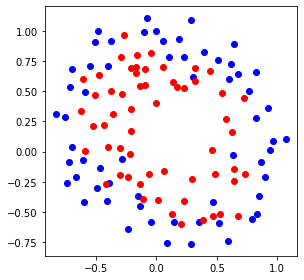

In [21]:
plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

#2. Plot the training error with varying regularization parameters

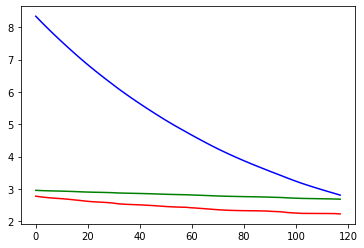

In [52]:
plt.figure()
plt.plot([i for i in range(len(cost1_array))], cost1_array, color='red')
plt.plot([i for i in range(len(cost2_array))], cost2_array, color='green')
plt.plot([i for i in range(len(cost3_array))], cost3_array, color='blue')

#3. Display the values of the chosen regularization parameters

In [53]:
print ('lambda1 =','\033[31m', lambda1,'\033[0m' )
print ('lambda2 =','\033[32m', lambda2,'\033[0m' )
print ('lambda3 =','\033[34m', lambda3,'\033[0m' )

lambda1 =  1e-05 
lambda2 =  0.01 
lambda3 =  0.1 


#4. Plot the training accuracy with varying regularization parameters

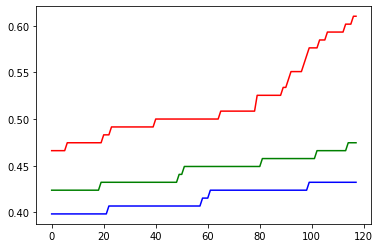

In [54]:
plt.figure()
plt.plot([i for i in range(len(training_accuracy_1))], sorted(training_accuracy_1), color='red')
plt.plot([i for i in range(len(training_accuracy_2))], sorted(training_accuracy_2), color='green')
plt.plot([i for i in range(len(training_accuracy_3))], sorted(training_accuracy_3), color='blue')

#5. Display the final training accuracy with varying regularization parameters 

In [55]:
print ('final training accuracy1 =','\033[31m', max(training_accuracy_1),'\033[0m' )
print ('final training accuracy2 =','\033[32m',  max(training_accuracy_2),'\033[0m' )
print ('final training accuracy3 =','\033[34m',  max(training_accuracy_3),'\033[0m' )

final training accuracy1 =  0.6101694915254238 
final training accuracy2 =  0.4745762711864407 
final training accuracy3 =  0.4322033898305085 


#6. Plot the optimal classifier with varying regularization parameters superimposed on the training data

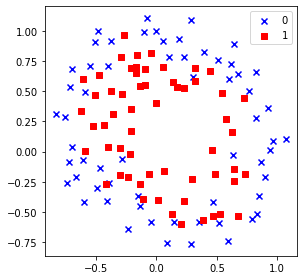

In [8]:
plt.figure()
plt.scatter(pointX0, pointY0, c='b',  marker = 'x' ,label = '0')
plt.scatter(pointX1, pointY1, c='r', marker = 's', label = '1')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()

%matplotlib inline
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
from matplotlib import style
from mylib.plotdregion import plot_decision_region

style.use('seaborn-talk')
